<a href="https://colab.research.google.com/github/patrycjapiechowicz/Projects/blob/DataWorkshop/titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.sample(6) # df.head()  = A Glimpse of the Datasets  (We want to predict if passanger survived)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q


# Type of variables

In [ ]:
# Categorical: nominal - ariables that have two or more categories, but which do not have an intrinsic order  = Cabin, Embarked

In [ ]:
# Categorical: dichotomous- only two categories = Sex

In [ ]:
# Categorical: ordinal have two or more categories, only the categories can also be ordered or ranked.) = Pclass

In [ ]:
# Numeric: discrete = Passenger ID,SibSp,Parch,Survived 

In [ ]:
# Numeric: continous = Age, Fare

In [ ]:
# Text Variable = Name, Ticket

# Overview and Cleaning the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Dealing with Missing values

In [ ]:
total=df.isnull().sum().sort_values(ascending=False)
percent=total/len(df)*100
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# Missing values : Cabin, Age, Embarked

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [ ]:
# Embarked
total=pd.DataFrame(df.loc[:,'Embarked'].value_counts(dropna=False))
percent=total/len(df.Embarked)*100
 #total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe
pd.concat([total, percent], axis=1, keys=['Total','Percent'])


,Total,Percent
,Embarked,Embarked
S,644,72.278339
C,168,18.855219
Q,77,8.641975
NaN,2,0.224467


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Title']=df.Name.str.split(pat=",").str[1]

In [ ]:
df['Title']=df.Title.str.split().str[0]

In [ ]:
df.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [ ]:
title_mapping={'Mr.': 0, 'Mrs.': 0, 'Miss.': 0, 'Master.' : 1,'Don.': 1, 'Rev.' : 1,'Dr.' : 1,'Mme.': 0, 'Ms.': 0, 'Major.': 1,
 'Lady.': 1, 'Sir.': 1, 'Mlle.': 0, 'Col.': 1, 'Capt.': 1, 'Jonkheer.': 1}

df.Title=df['Title'].map(title_mapping)

In [ ]:
df[df.Title.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,NaN


In [ ]:
df.Title=df.Title.fillna(0)

In [ ]:
df=df.drop('Name',axis=1)

In [ ]:
for i,j in enumerate (df['SibSp']):
    if j!=0:
        df['SibSp'][i]=1
for k,l in enumerate (df['Parch']):
    if l!=0:
        df['Parch'][k]=1
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.SibSp.unique()

array([1, 0])

In [ ]:
df.Parch.unique()

array([0, 1])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df.Age=df.Age.fillna(29)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN,0.0
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN,0.0


Text(0.5, 1.0, 'Training Set')

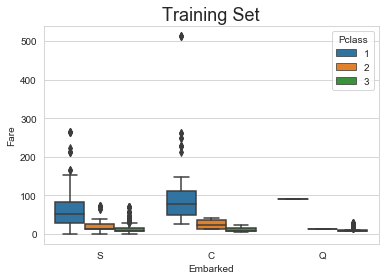

In [ ]:
a=sns.boxplot(df.Embarked,df.Fare,hue=df.Pclass)
sns.set_style('darkgrid')
a.set_title("Training Set", fontsize = 18)

In [ ]:
df.Embarked.fillna('C', inplace=True)

In [ ]:
# Cabin
total=pd.DataFrame(df.loc[:,'Cabin'].value_counts(dropna=False))
percent=total/len(df.Cabin)*100
 #total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe
pd.concat([total, percent], axis=1, keys=['Total','Percent'])


# 77% of Cabin feature is missing in the training data

,Total,Percent
,Cabin,Cabin
NaN,687,77.104377
B96 B98,4,0.448934
G6,4,0.448934
C23 C25 C27,4,0.448934
E101,3,0.336700
...,...,...
E68,1,0.112233
A26,1,0.112233
D30,1,0.112233


In [ ]:
df=df.drop(['Cabin'],axis=1)

In [ ]:
df.isnull().sum() # AGE! - important value

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [ ]:
#Assumptions:

#Gender: More female survived than male
#Pclass: Higher socio-economic status passenger survived more than others.
#Age: Younger passenger survived more than other passengers.
#Fare: Passenger with higher fare survived more that other passengers. This can be quite correlated with Pclass.

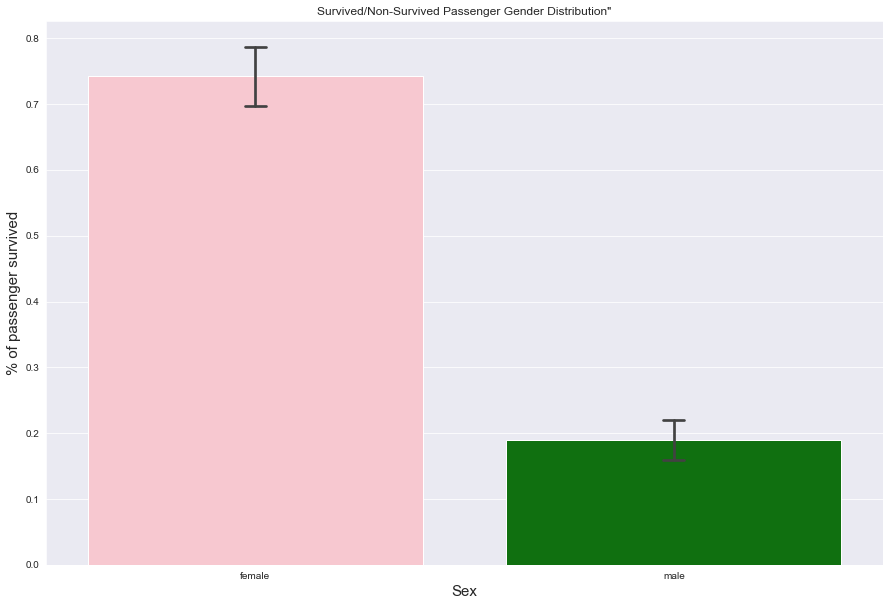

In [ ]:
plt.subplots(figsize = (15,10))
pal = {'male':"green", 'female':"Pink"}
sns.barplot(df.Sex,df.Survived,order = ['female','male'],palette=pal,capsize = .05)
plt.title('Survived/Non-Survived Passenger Gender Distribution"')
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

#This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

Text(0, 0.5, 'of Passenger Survived')

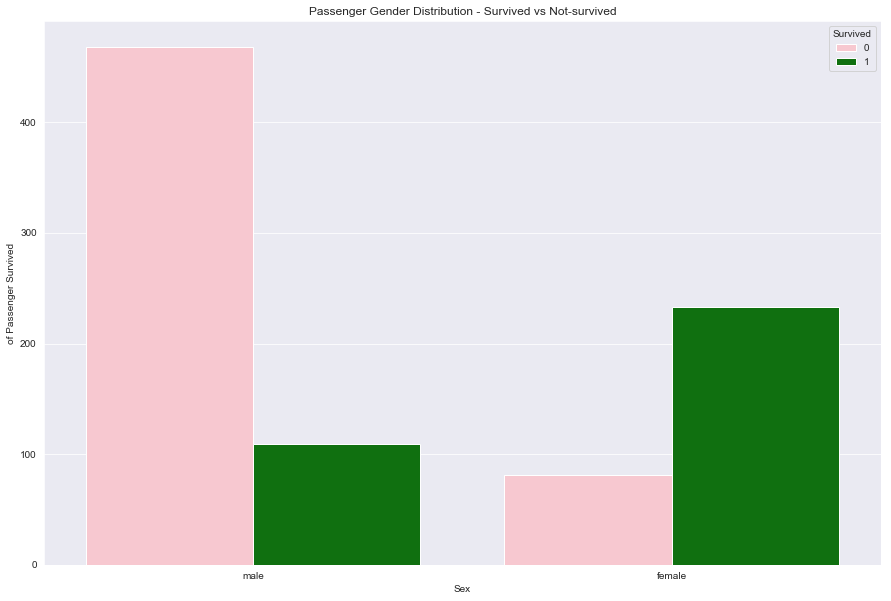

In [ ]:
plt.subplots(figsize = (15,10))
pal = {1:"green", 0:"Pink"}
sns.countplot(df.Sex, hue=df.Survived,palette=pal,capsize = .05)
plt.title("Passenger Gender Distribution - Survived vs Not-survived")
plt.xlabel('Sex',fontsize = 10)
plt.ylabel('of Passenger Survived', fontsize = 10)

#t shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

([<matplotlib.axis.XTick at 0x108ae7990>,
 <a list of 3 Text xticklabel objects>)

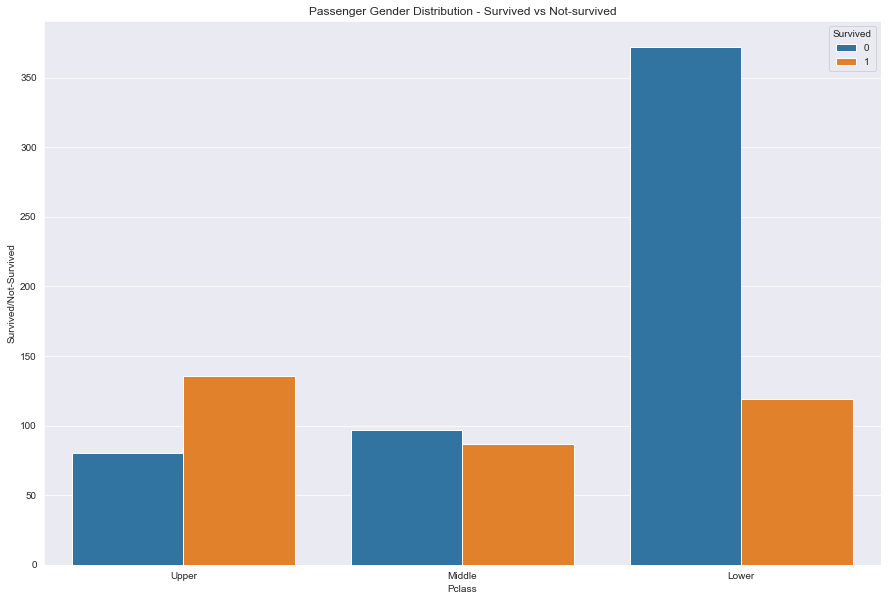

In [ ]:
plt.subplots(figsize = (15,10))
sns.countplot(df.Pclass, hue=df.Survived)
plt.title("Passenger Gender Distribution - Survived vs Not-survived")
plt.xlabel('Pclass',fontsize = 10)
plt.ylabel('Survived/Not-Survived', fontsize = 10)
r=[0,1,2]
names=('Upper','Middle','Lower')
plt.xticks(r,names)

#t shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0.0


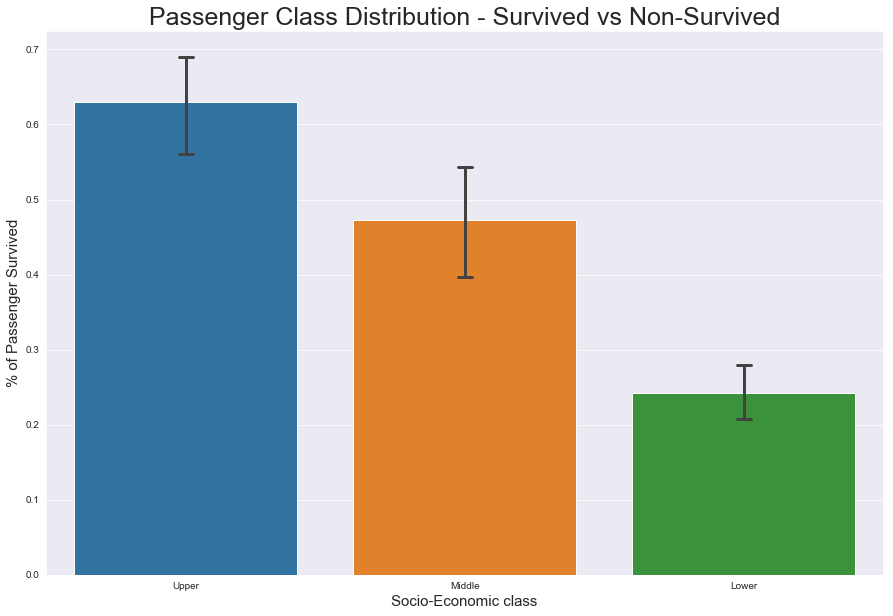

In [ ]:
plt.subplots(figsize = (15,10))
sns.barplot(df.Pclass,df.Survived,errwidth = 3,capsize = .05)
r=[0,1,2]
names=('Upper','Middle','Lower')
plt.xticks(r,names)

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);

In [ ]:
#It looks like ...
#63% first class passenger survived titanic tragedy, while
#48% second class and
#only 24% third class passenger survived

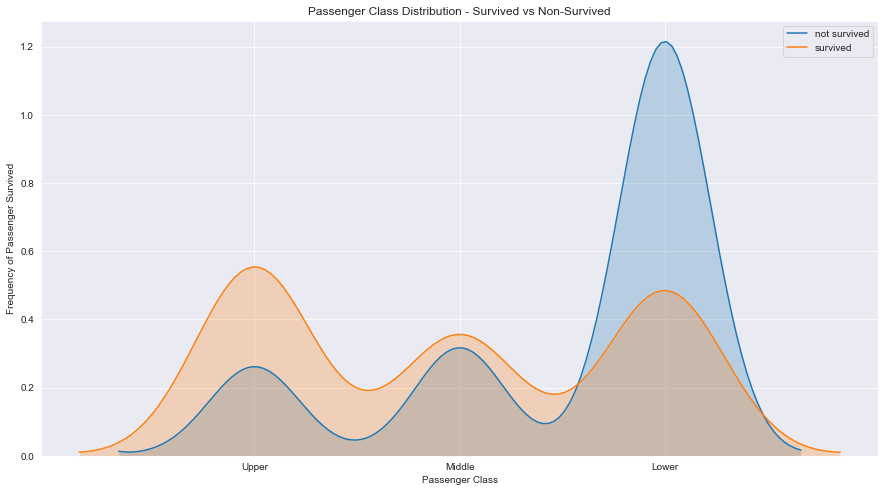

In [ ]:
fig=plt.figure(figsize=(15,8))

sns.kdeplot(df.Pclass[df.Survived==0],label='not survived',shade=True)
sns.kdeplot(df.Pclass[df.Survived==1],label='survived', shade=True)
plt.xlabel("Passenger Class")
plt.ylabel('Frequency of Passenger Survived')
plt.title("Passenger Class Distribution - Survived vs Non-Survived")
r=[0,1,2]
names=('Upper','Middle','Lower')
plt.xticks(r,names)
plt.xticks(sorted(df.Pclass.unique()), names);

Text(0.5, 1.0, 'Fare Distribution - Survived vs Non-Survived')

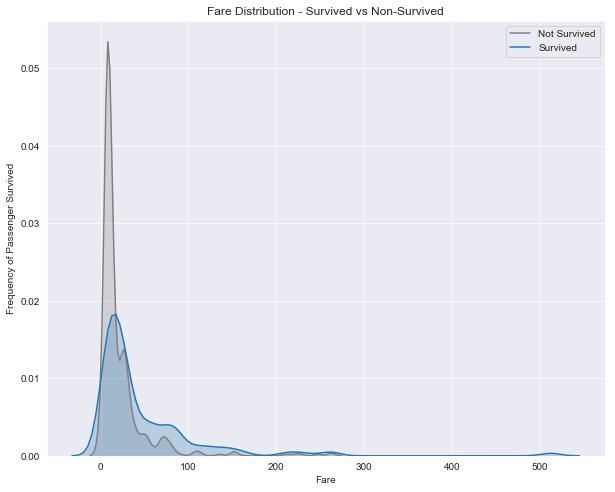

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.kdeplot(df.Fare[df.Survived==0], color='grey',label='Not Survived',shade=True)
sns.kdeplot(df.Fare[df.Survived==1],label='Survived',shade=True)
plt.xlabel("Fare")
plt.ylabel('Frequency of Passenger Survived')
plt.title("Fare Distribution - Survived vs Non-Survived")

In [ ]:
df[df.Fare>280]  #outliers

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,C,0.0
679,680,1,1,male,36.0,0,1,PC 17755,512.3292,C,0.0
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,C,0.0


Text(0.5, 1.0, 'Age Distribution - Survived vs Non-Survived')

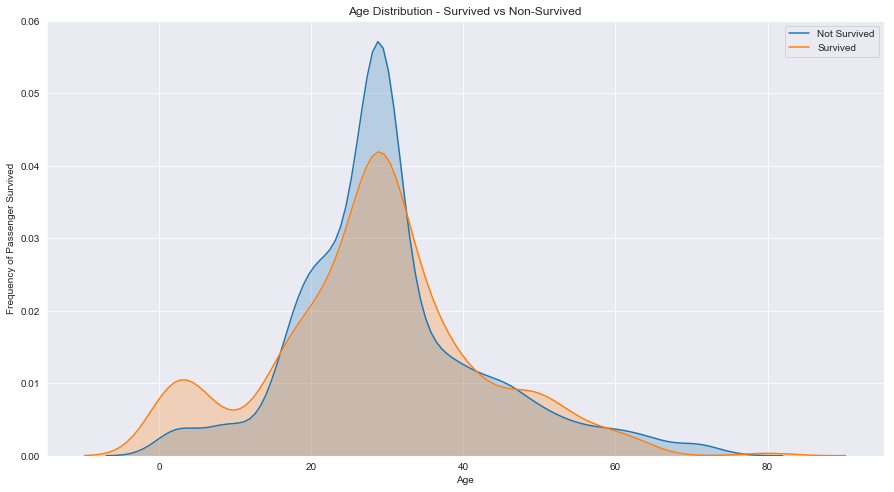

In [ ]:
fig=plt.figure(figsize=(15,8))
sns.kdeplot(df.Age[df.Survived==0],label='Not Survived',shade=True)
sns.kdeplot(df.Age[df.Survived==1],label='Survived',shade=True)
plt.xlabel("Age")
plt.ylabel('Frequency of Passenger Survived')
plt.title("Age Distribution - Survived vs Non-Survived")

#children and infants were the priority.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.317621,0.239057,32.204208,0.069585
std,257.353842,0.486592,0.836071,13.005010,0.465813,0.426747,49.693429,0.254589
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,1.000000,1.000000,512.329200,1.000000


In [ ]:
df.describe(include='O')

,Sex,Ticket,Embarked
count,891,891,891
unique,2,681,3
top,male,CA. 2343,S
freq,577,7,644


In [ ]:
df_S=df.groupby('Survived')

In [ ]:
df_S.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title
Survived,,,,,,,
0,447.016393,2.531876,30.25592,0.275046,0.189435,22.117887,0.058288
1,444.368421,1.950292,28.44348,0.385965,0.318713,48.395408,0.087719


In [ ]:
df_A=df.groupby('Pclass')

In [ ]:
df_A.mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title
Pclass,,,,,,,
1,461.597222,0.629630,36.951019,0.365741,0.245370,84.154687,0.078704
2,445.956522,0.472826,29.825163,0.347826,0.271739,20.662183,0.092391
3,439.154786,0.242363,26.209613,0.285132,0.224033,13.675550,0.057026


In [ ]:
df_Sex=df.groupby('Sex').mean()

In [ ]:
df_Sex

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,28.098726,0.445860,0.382166,44.479818,0.006369
male,454.147314,0.188908,2.389948,30.355581,0.247834,0.161179,25.523893,0.103986


In [ ]:
df['Survived'].count()

891

In [ ]:
q=pd.DataFrame(df['Survived'].value_counts())
p=pd.DataFrame(df['Survived'].value_counts()/len(df.Survived)*100)
q

,Survived
0,549
1,342


In [ ]:
pd.concat([q,p],axis=1,keys=['n','%']) # 38% survived

,n,%
,Survived,Survived
0,549,61.616162
1,342,38.383838


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
PassengerId,1.000000,-0.005007,-0.035144,0.033632,-0.053397,0.005167,0.012658,0.013188
Survived,-0.005007,1.000000,-0.338481,-0.067814,0.115867,0.147408,0.257307,0.056252
Pclass,-0.035144,-0.338481,1.000000,-0.334974,-0.076009,-0.027526,-0.549500,-0.042947
Age,0.033632,-0.067814,-0.334974,1.000000,-0.146271,-0.258365,0.093706,-0.188027
SibSp,-0.053397,0.115867,-0.076009,-0.146271,1.000000,0.420233,0.192190,0.192405
Parch,0.005167,0.147408,-0.027526,-0.258365,0.420233,1.000000,0.237717,0.270735
Fare,0.012658,0.257307,-0.549500,0.093706,0.192190,0.237717,1.000000,0.014198
Title,0.013188,0.056252,-0.042947,-0.188027,0.192405,0.270735,0.014198,1.000000


In [ ]:
pd.DataFrame(abs(df.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.147408
SibSp,0.115867
Age,0.067814
Title,0.056252
PassengerId,0.005007


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0.0


In [ ]:
df.Sex=df.Sex.replace('female',1)

In [ ]:
df.Sex=df.Sex.replace('male',0)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,0,35.0,0,0,373450,8.0500,S,0.0


In [ ]:
pd.DataFrame(abs(df.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Parch,0.147408
SibSp,0.115867
Age,0.067814
Title,0.056252
PassengerId,0.005007


In [ ]:
#Sex is the most important correlated feature with Survived(dependent variable) feature followed by Pclass.

Text(0.5, 1.0, 'Correlations Among Features')

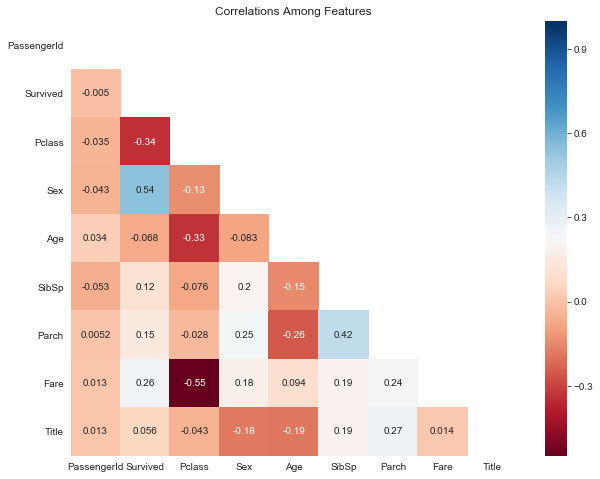

In [ ]:
sns.set_style('whitegrid')
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),cmap = 'RdBu',mask=mask,annot=True)
plt.title('Correlations Among Features')

# Statistical Test for Correlation

In [ ]:
#Hypothesis Testing Outline:  1. Formulate a well-developed research problem or question

In [ ]:
#2. The null hypothesis( 𝐻0 ) and Alternating hypothesis( 𝐻1 ):
#The null hypothesis( 𝐻0 ) is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.
#An Alternative hypothesis( 𝐻𝐴 ) is a claim and the opposite of the null hypothesis. It is going against the status quo. In an alternative theory, the observations show a real effect combined with a component of chance variation.

In [ ]:
#3. Determine the test statistic: test statistic can be used to assess the truth of the null hypothesis.

In [ ]:
#Depending on the standard deviation we either use t-statistics or z-statistics. 
#In addition to that, we want to identify whether the test is a one-tailed test or two-tailed test

In [ ]:
#4. Specify a Significance level and Confidence Interval: 
#The significance level( 𝛼 ) is the probability of rejecting a null hypothesis when it is true. 
#In other words, we are comfortable/confident with rejecting the null hypothesis a significant amount of 
#times even though it is true. This considerable amount is our Significant level. 
#In addition to that, Significance level is one minus our Confidence interval. 
#For example, if we say, our significance level is 5%, 
#then our confidence interval would be (1 - 0.05) = 0.95 or 95%.

In [ ]:
#5 ompute the T-Statistics/Z-Statistics: Computing the t-statistics follows a simple equation. 
#This equation slightly differs depending on one sample test or two sample test

In [ ]:
#6 Compute the P-value: P-value is the probability that a test statistic at least as significant 
#as the one observed would be obtained assuming that the null hypothesis is correct. 
# The smaller the P-value, the stronger the evidence against the null hypothesis.

In [ ]:
#7 Describe the result and compare the p-value with the significance value( 𝛼 ): 
#If p<= 𝛼 , then the observed effect is statistically significant, the null hypothesis is ruled out, 
#and the alternative hypothesis is valid. However if the p>  𝛼 , we say that, we fail 
#to reject the null hypothesis. 
#Even though this sentence is grammatically wrong, it is logically right.

# Hypothesis testing for Titanic

In [ ]:
#1. Formulating a well developed researched question: 
#Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?.

In [ ]:
#2. The Null Hypothesis and The Alternative Hypothesis:
#Null Hypothesis( 𝐻0 ): There is no difference in the survival rate between the male and female passengers.
#Alternative Hypothesis( 𝐻𝐴 ): There is a difference in the survival rate between the male and female passengers.

In [ ]:
#3. Determine the test statistics:  his will be a two-tailed test since the difference between male and female passenger in 
#the survival rate could be higher or lower than 0. (<=,>=) Since we do not know the standard deviation( 𝜎 ) and n is small, we will use the t-distribution.

In [ ]:
#4. Specify the significance level : significance level( 𝛼 ) = 0.05. 
#So, our confidence interval or non-rejection region would be (1 -  𝛼 )=(1-0.05) = 95%.

In [ ]:
#5. Computing T-statistics and P-value

In [ ]:
male_mean=df[df.Sex==0].Survived.mean()

In [ ]:
male_mean

0.18890814558058924

In [ ]:
female_mean=df[df.Sex==1].Survived.mean()

In [ ]:
female_mean

0.7420382165605095

In [ ]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
Sex,,,,,,,,
0,454.147314,0.188908,2.389948,30.355581,0.247834,0.161179,25.523893,0.103986
1,431.028662,0.742038,2.159236,28.098726,0.445860,0.382166,44.479818,0.006369


In [ ]:
print('The mean difference between male and female survival rate: '+ str(female_mean-male_mean))

The mean difference between male and female survival rate: 0.5531300709799203


In [ ]:
#create 50 random samples for F and for M:
import random
female=df[df['Sex']==1]
male=df[df['Sex']==0]
# empty list for storing mean sample
f_sample=[]
m_sample=[]
for i in range(50):
    m_sample.append(np.mean(random.sample(list(male['Survived']),50,)))
    f_sample.append(np.mean(random.sample(list(female['Survived']),50,)))
    

In [ ]:
f=np.mean(f_sample)

In [ ]:
m=np.mean(m_sample)

In [ ]:
Diff=f-m

In [ ]:
Diff

0.5599999999999999

In [ ]:
f

0.738

In [ ]:
m

0.17800000000000002

In [ ]:
#H0: male mean is greater or equal to female mean
#H1: male mean is less than female mean.

In [ ]:
df=df.drop('Ticket',axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0.0
1,2,1,1,1,38.0,1,0,71.2833,C,0.0
2,3,1,3,1,26.0,0,0,7.9250,S,0.0
3,4,1,1,1,35.0,1,0,53.1000,S,0.0
4,5,0,3,0,35.0,0,0,8.0500,S,0.0


In [ ]:
df=df.drop('PassengerId',axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0.0
1,1,1,1,38.0,1,0,71.2833,C,0.0
2,1,3,1,26.0,0,0,7.9250,S,0.0
3,1,1,1,35.0,1,0,53.1000,S,0.0
4,0,3,0,35.0,0,0,8.0500,S,0.0


In [ ]:
df = pd.get_dummies(df, columns=["Pclass",'Embarked'], drop_first=False)

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0.0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0.0,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0.0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0.0,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0.0,0,0,1,0,0,1


In [ ]:
df=df.drop('Name',axis=1)

KeyError: "['Name'] not found in axis"

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0.0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0.0,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0.0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0.0,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0.0,0,0,1,0,0,1


In [ ]:
df.isnull().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

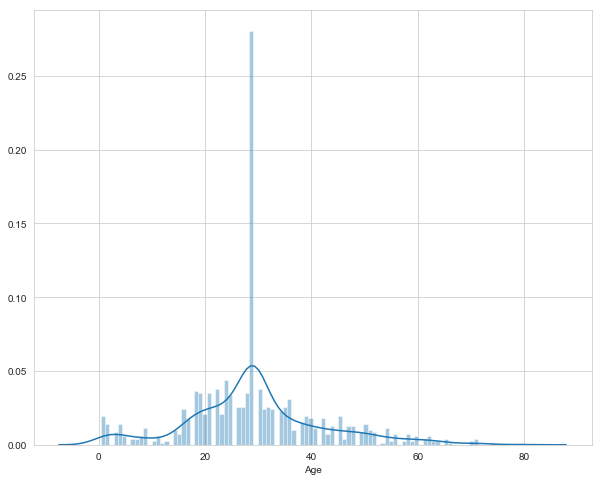

In [ ]:
plt.subplots(figsize=(10,8))
sns.distplot(df.Age,kde=True, bins=100,rug=False,norm_hist=False)

In [ ]:
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

In [ ]:
df['Age_group']=df['Age'].map(age_group_fun)

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Age_group
0,0,0,22.0,1,0,7.2500,0.0,0,0,1,0,0,1,Young_Adult
1,1,1,38.0,1,0,71.2833,0.0,1,0,0,1,0,0,adult
2,1,1,26.0,0,0,7.9250,0.0,0,0,1,0,0,1,Young_Adult
3,1,1,35.0,1,0,53.1000,0.0,1,0,0,0,0,1,Young_Adult
4,0,0,35.0,0,0,8.0500,0.0,0,0,1,0,0,1,Young_Adult


In [ ]:
df=pd.get_dummies(df, columns=['Age_group'],drop_first=True)

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Age_group_adult,Age_group_child,Age_group_infant,Age_group_middle_aged,Age_group_old,Age_group_senior_citizen,Age_group_teenager,Age_group_toddler
0,0,0,22.0,1,0,7.2500,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,26.0,0,0,7.9250,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(['Survived'], axis = 1)
y = df["Survived"]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Survived                    0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Fare                        0
Title                       0
Pclass_1                    0
Pclass_2                    0
Pclass_3                    0
Embarked_C                  0
Embarked_Q                  0
Embarked_S                  0
Age_group_adult             0
Age_group_child             0
Age_group_infant            0
Age_group_middle_aged       0
Age_group_old               0
Age_group_senior_citizen    0
Age_group_teenager          0
Age_group_toddler           0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [ ]:
len(X_train)

596

In [ ]:
df.head()
X.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_group_adult',
       'Age_group_child', 'Age_group_infant', 'Age_group_middle_aged',
       'Age_group_old', 'Age_group_senior_citizen', 'Age_group_teenager',
       'Age_group_toddler'],
      dtype='object')

In [ ]:
headers = X.columns 
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()
X_train = st_scale.fit_transform(X_train)


In [ ]:
y_train

242    0
344    0
170    0
187    1
800    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 596, dtype: int64

# Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [ ]:
logreg = LogisticRegression(solver='liblinear')

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 21 columns):
Survived                    891 non-null int64
Sex                         891 non-null int64
Age                         891 non-null float64
SibSp                       891 non-null int64
Parch                       891 non-null int64
Fare                        891 non-null float64
Title                       891 non-null float64
Pclass_1                    891 non-null uint8
Pclass_2                    891 non-null uint8
Pclass_3                    891 non-null uint8
Embarked_C                  891 non-null uint8
Embarked_Q                  891 non-null uint8
Embarked_S                  891 non-null uint8
Age_group_adult             891 non-null uint8
Age_group_child             891 non-null uint8
Age_group_infant            891 non-null uint8
Age_group_middle_aged       891 non-null uint8
Age_group_old               891 non-null uint8
Age_group_senior_citizen    891 non-null ui

In [ ]:
np.isnan(df).sum()

Survived                    0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Fare                        0
Title                       0
Pclass_1                    0
Pclass_2                    0
Pclass_3                    0
Embarked_C                  0
Embarked_Q                  0
Embarked_S                  0
Age_group_adult             0
Age_group_child             0
Age_group_infant            0
Age_group_middle_aged       0
Age_group_old               0
Age_group_senior_citizen    0
Age_group_teenager          0
Age_group_toddler           0
dtype: int64

In [ ]:
np.isfinite(df).sum()

Survived                    891
Sex                         891
Age                         891
SibSp                       891
Parch                       891
Fare                        891
Title                       891
Pclass_1                    891
Pclass_2                    891
Pclass_3                    891
Embarked_C                  891
Embarked_Q                  891
Embarked_S                  891
Age_group_adult             891
Age_group_child             891
Age_group_infant            891
Age_group_middle_aged       891
Age_group_old               891
Age_group_senior_citizen    891
Age_group_teenager          891
Age_group_toddler           891
dtype: int64

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.376271186440678

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,0,184
Survived,0,111


In [ ]:
df.head().isnull().sum()

Survived                    0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Fare                        0
Title                       0
Pclass_1                    0
Pclass_2                    0
Pclass_3                    0
Embarked_C                  0
Embarked_Q                  0
Embarked_S                  0
Age_group_adult             0
Age_group_child             0
Age_group_infant            0
Age_group_middle_aged       0
Age_group_old               0
Age_group_senior_citizen    0
Age_group_teenager          0
Age_group_toddler           0
dtype: int64

In [ ]:
df=df.drop(['Cabin'],axis=1)

KeyError: "['Cabin'] not found in axis"

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Age_group_adult,Age_group_child,Age_group_infant,Age_group_middle_aged,Age_group_old,Age_group_senior_citizen,Age_group_teenager,Age_group_toddler
0,0,0,22.0,1,0,7.2500,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,26.0,0,0,7.9250,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.Sex=df['Sex'].replace('male', 0)
df.Sex=df['Sex'].replace('female', 1)
df.Embarked=df['Embarked'].replace('S',1)
df.Embarked=df['Embarked'].replace('C',2)
df.Embarked=df['Embarked'].replace('Q',3)

KeyError: 'Embarked'

In [ ]:
df.Embarked.unique()

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Age_group_adult,Age_group_child,Age_group_infant,Age_group_middle_aged,Age_group_old,Age_group_senior_citizen,Age_group_teenager,Age_group_toddler
0,0,0,22.0,1,0,7.2500,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,26.0,0,0,7.9250,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df=df.drop('Ticket',axis=1)

KeyError: "['Ticket'] not found in axis"

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Age_group_adult,Age_group_child,Age_group_infant,Age_group_middle_aged,Age_group_old,Age_group_senior_citizen,Age_group_teenager,Age_group_toddler
0,0,0,22.0,1,0,7.2500,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,26.0,0,0,7.9250,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
